6 лабораторная по Анализу данных

In [67]:
#Импорт библиотек(все уже есть в анаконде) 

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
sns.set(color_codes=True)

(13.5, -0.5)

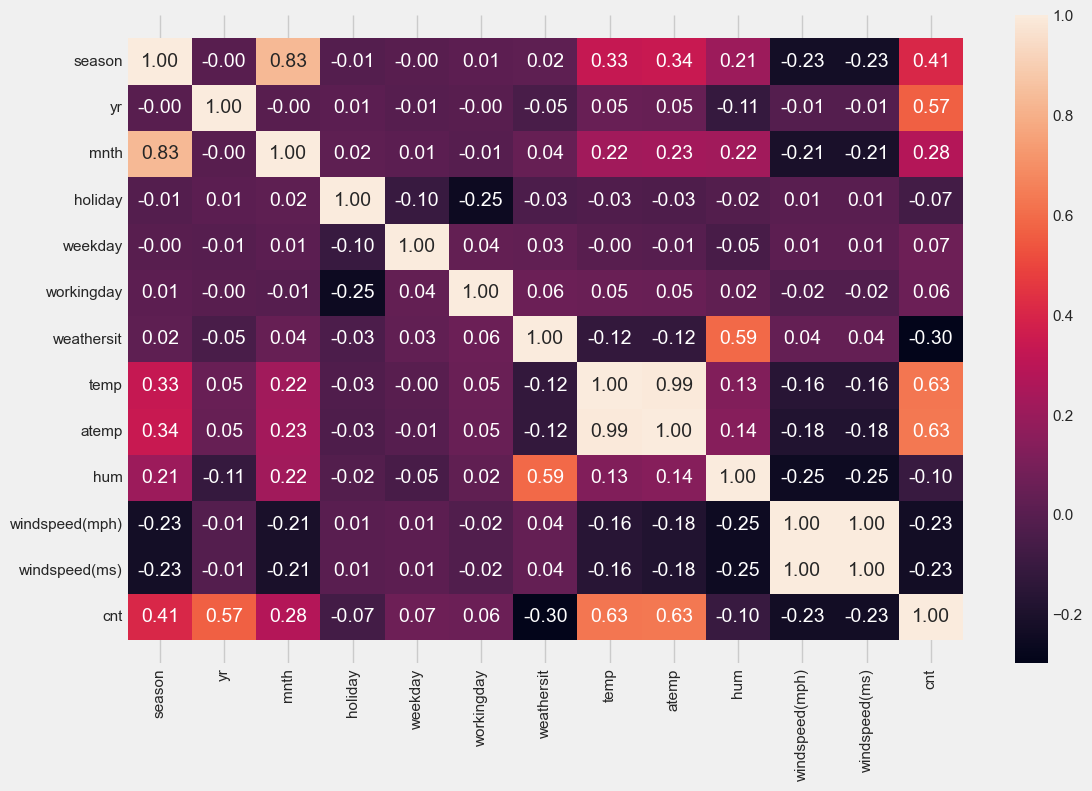

In [68]:
#Задание 1
#Прокат велосипедов
warnings.filterwarnings("ignore") 
plt.style.use("fivethirtyeight")
df = pd.read_csv("csv/bikes_rent.csv")
#Описание датафрейма
df.describe().T
#Создание графика
plt.figure(figsize = (12,8))
# корреляция (1 - полная линейная, 0 - отсутсвие линейной корреляции, -1 отрицательная линейная корреляция)
ax = sns.heatmap(df.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

<Axes: >

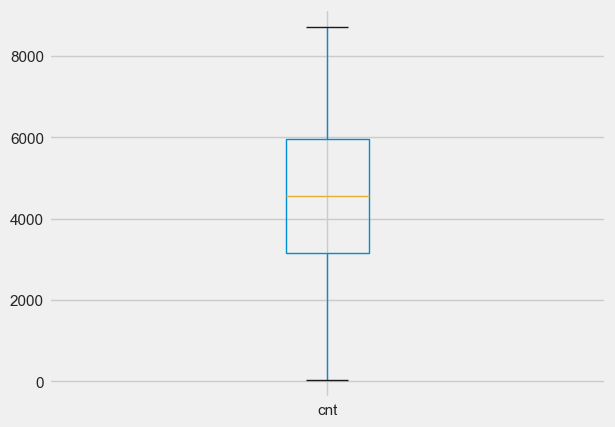

In [15]:
#Боксплот
#Черные линии -  минимум и максимум
#Желтая линия  - медиана
#Границами ящика служат первый и третий квартили (25% и 75% в описании)
df.boxplot(column="cnt")

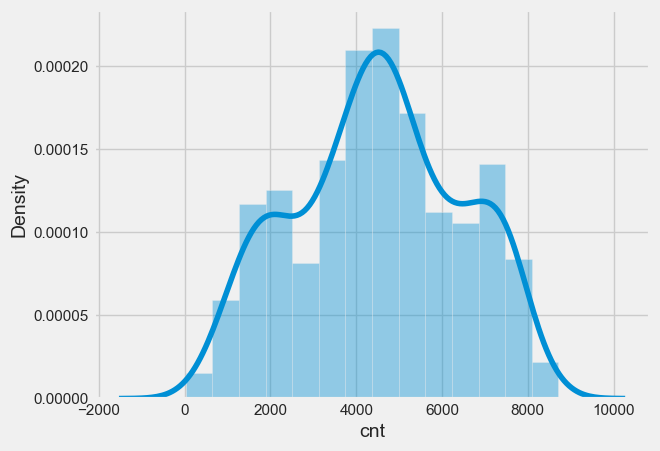

In [19]:
#По у плотность распределения, по х кол-во взятых велосипедов
#sns.distplot(df["cnt"]);

<Axes: >

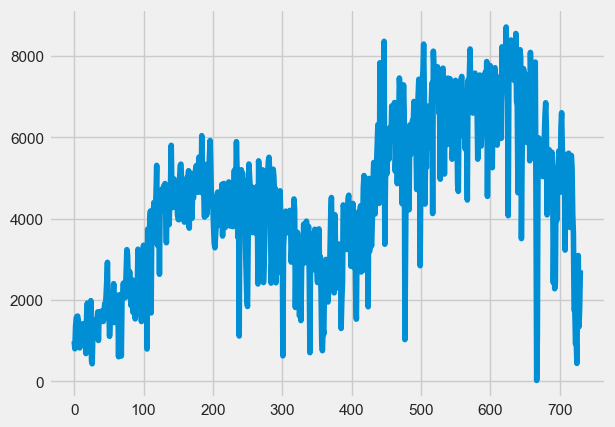

In [22]:
#По х день, по у кол-во арендованных велосипедов
df["cnt"].plot()

<Axes: xlabel='season', ylabel='cnt'>

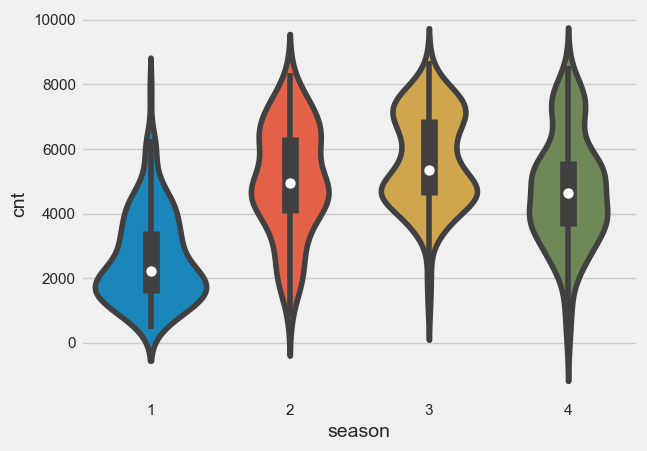

In [25]:
#По х сезон, по у кол-во
sns.violinplot(x=df["season"], y=df["cnt"])

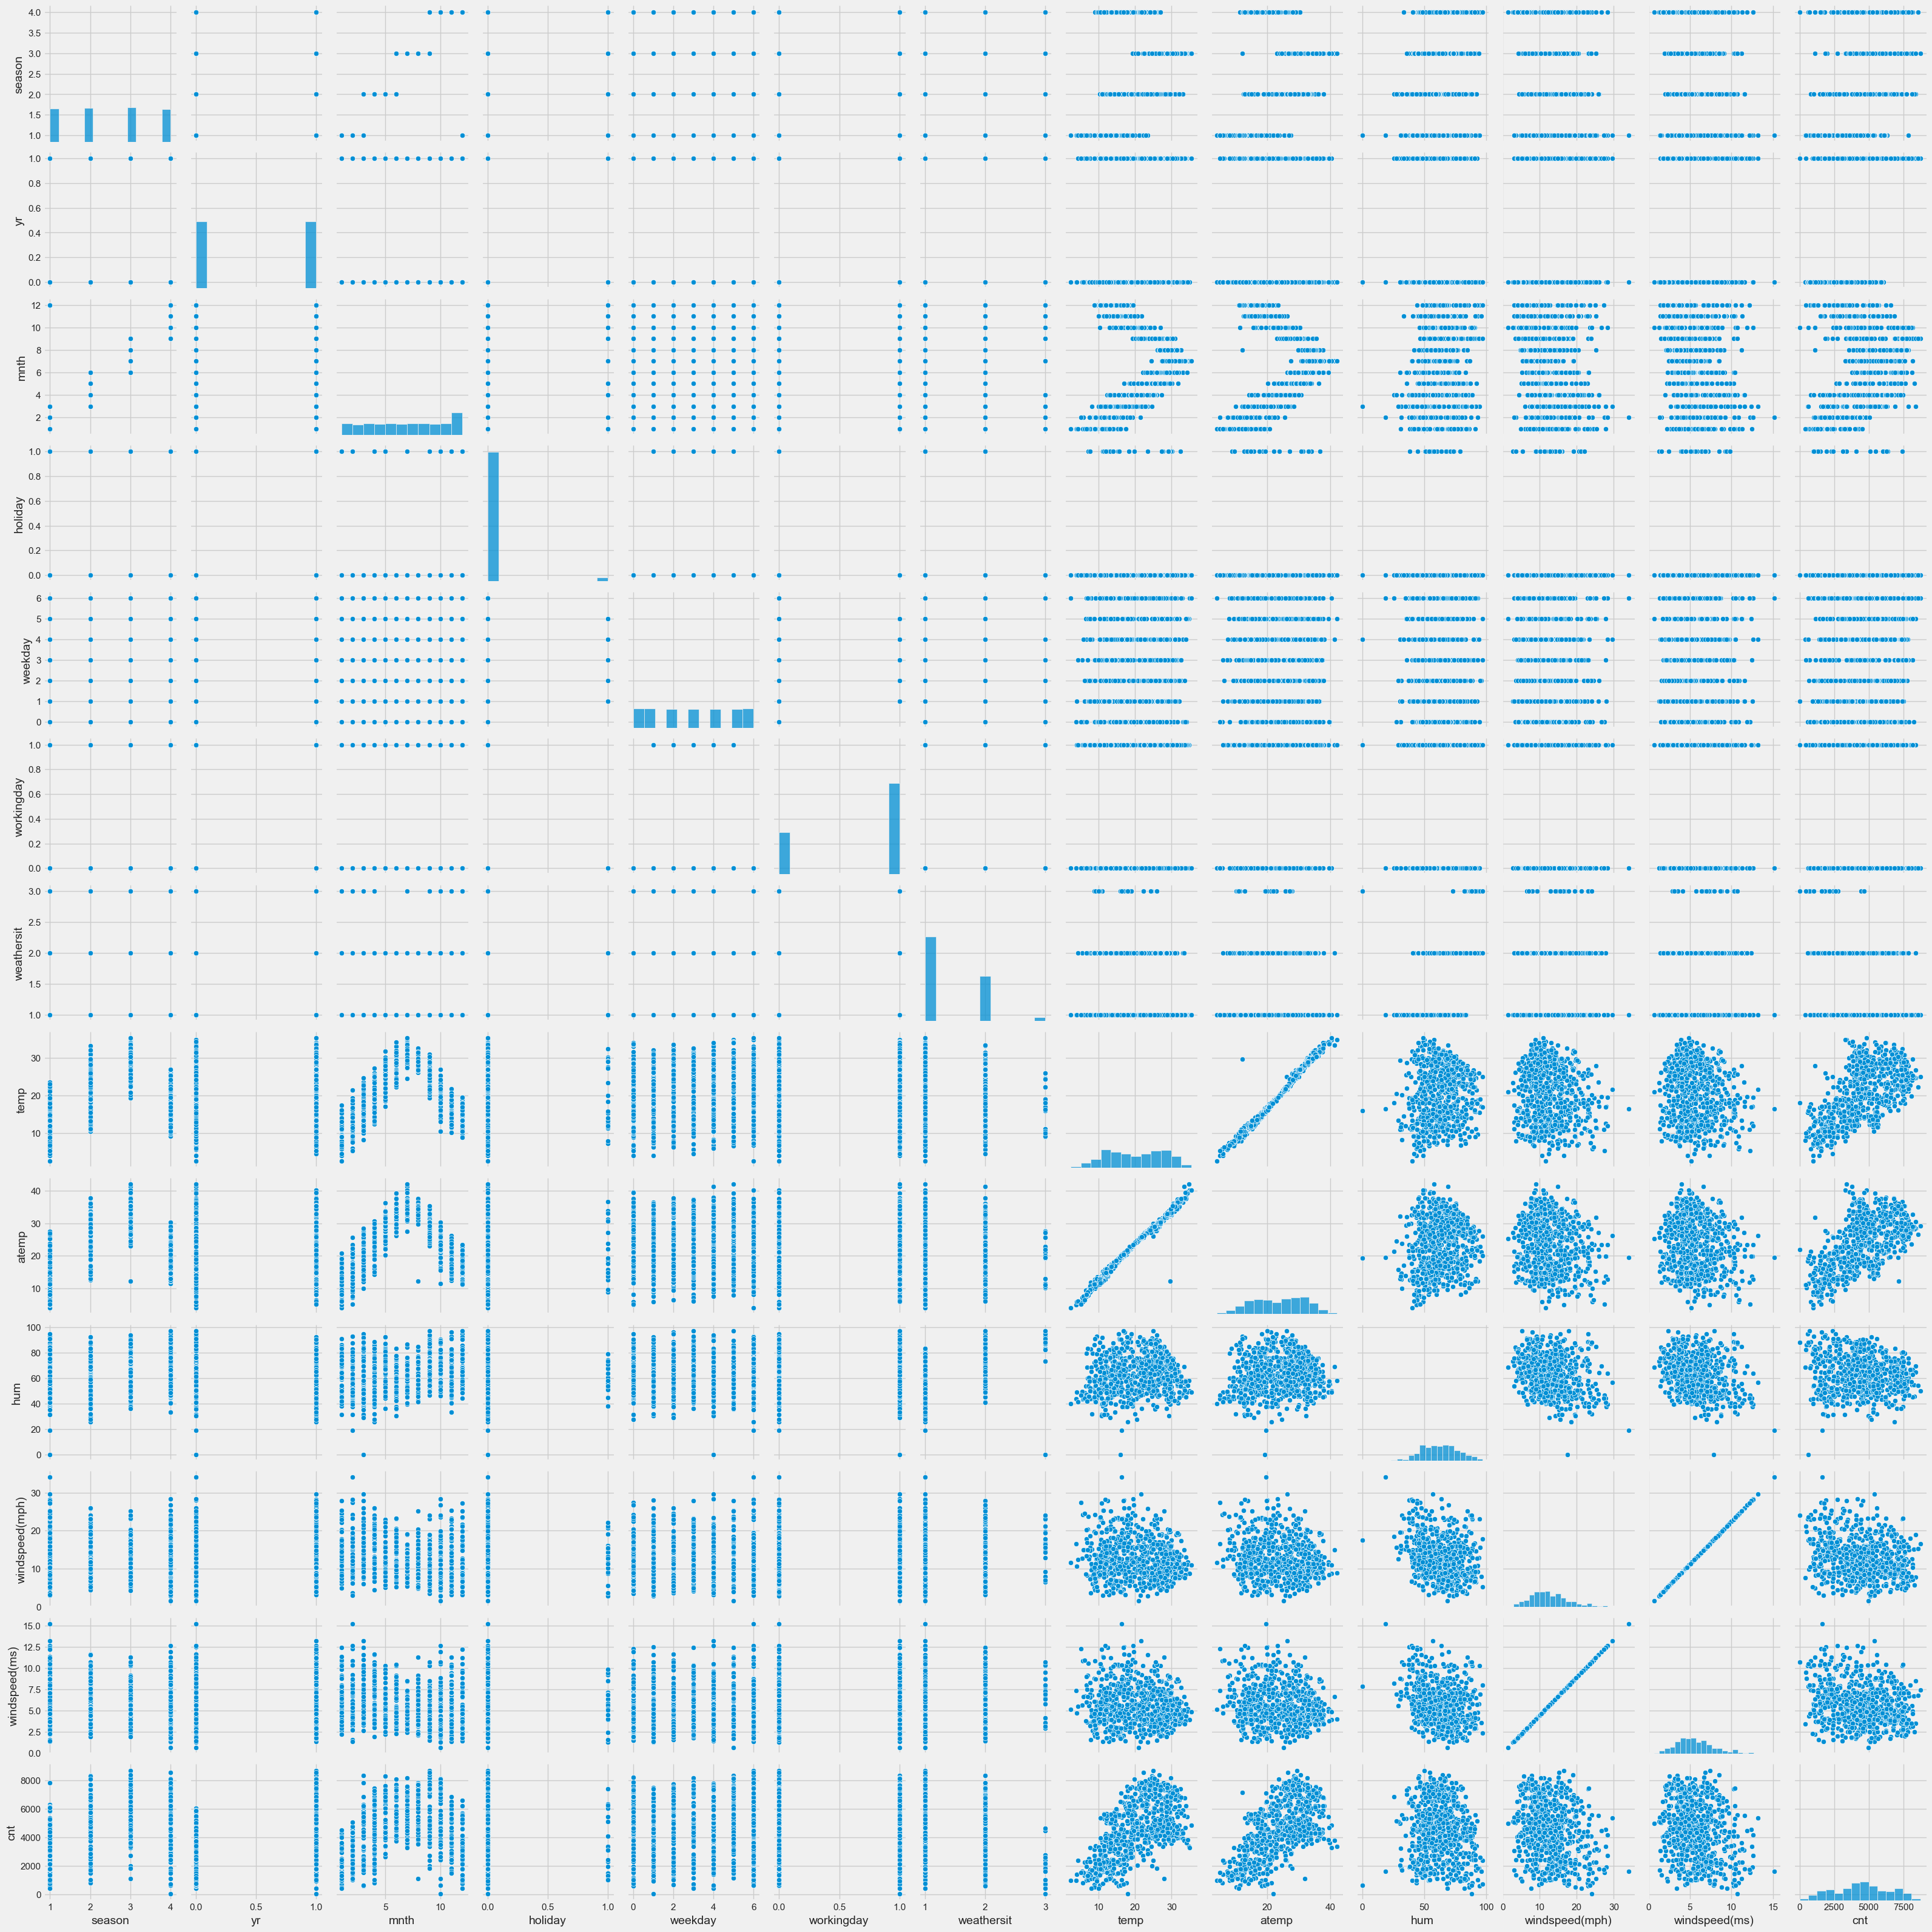

In [26]:
sns.pairplot(df.iloc[:,:])

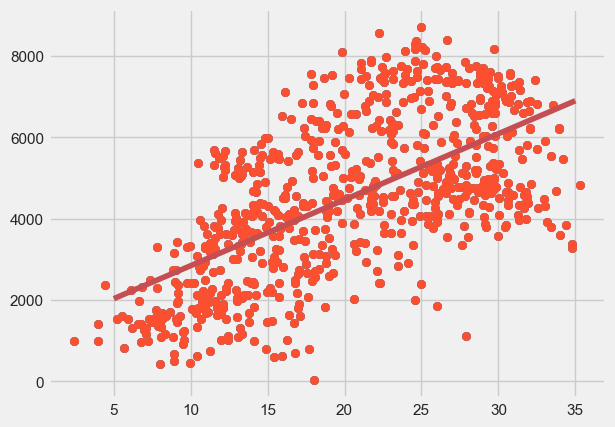

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
plt.scatter(df["temp"], df['cnt'])
linreg = LinearRegression(fit_intercept = True) 

X2= df["temp"]
y2= df["cnt"]

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, 
         test_size = 0.3, random_state=42)

#x2_train= x2_train.
linreg.fit(np.array(x2_train).reshape(-1, 1), y2_train)
a = linreg.coef_
b = linreg.intercept_
plt.scatter(df["temp"], df['cnt'])

plt.plot([5, 35], [a*5 + b, a*35 + b], "r")


In [30]:
a*37 + b

array([7225.04161148])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


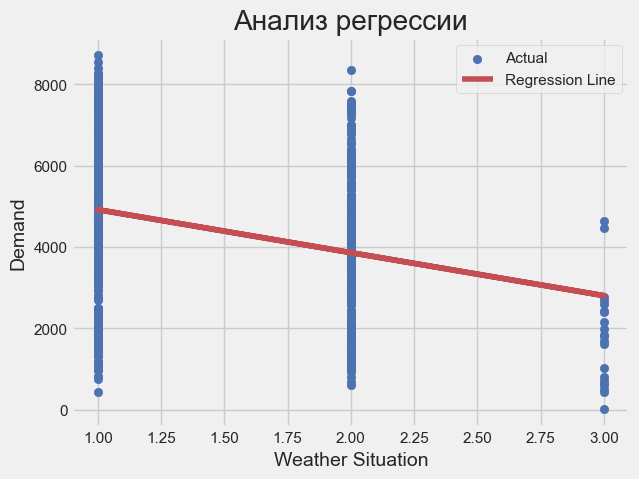

In [38]:
#In[19]
#Создание экземпляра модели линейной регрессии
model = LinearRegression()

#Выбор признака (X) и целевой переменной (y)
X = df['weathersit'].values.reshape(-1, 1)
y = df['cnt'].values

#Обучение модели
model.fit(X, y)
#Получение предсказаний модели
y_pred = model.predict(X)

#Построение графика
plt.scatter(X, y, color='b', label='Actual')
plt.plot(X, y_pred, color='r', label='Regression Line')
plt.xlabel('Weather Situation')
plt.ylabel('Demand')
plt.title('Анализ регрессии')
plt.legend()
plt.show()

In [47]:
linreg = LinearRegression(fit_intercept = True) 
# параметр fit_intercept отвечает за смещение w_0, смещение не равно 0, если    fit_intercept = True
#Выбросим из набора целевой столбец, а также столбцы (atemp, windspeed(mph), сильно скореллированные c temp, windspeed(ms))
X = df.drop(["cnt", "atemp", "windspeed(mph)"], axis = 1)
y = df["cnt"]
df.info()
X.shape, y.shape
#Сделаем стандартизацию (приведем данные к одному масштабу):
X_scal = StandardScaler().fit_transform(X)
#Разделим данные на тренировочные и тестовые (70% к 30%):
x_train, x_test, y_train, y_test = train_test_split(X_scal, y,test_size = 0.3, random_state=42)
#Обучим модель линейной регрессии на тренировочных данных:
linreg.fit(x_train, y_train)
LinearRegression()
#Сделаем предсказание на тестовой выборке
y_pred = linreg.predict(X_scal)
y_pred.shape
df["cnt"][100]
y_pred[100]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


3032.4950705667093

In [66]:
np.sqrt(mean_squared_error(y_test, linreg.predict(x_test)))
X.columns, linreg.coef_ # признаки и соответствующие коэффициенты
linreg.intercept_ # коэффицент w0
pd.DataFrame(linreg.coef_, X.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)
#linreg.predict(X_scal)[0] df["cnt"][0] 
#np.sqrt(mean_squared_error(linreg.predict(X_scal), df["cnt"]))

ValueError: Shape of passed values is (12, 1), indices imply (10, 1)

In [59]:

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso.coef_, lasso.intercept_
X.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed(ms)'],
      dtype='object')

In [57]:
pd.DataFrame(lasso.coef_, X.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,994.952437
temp,955.839633
season,598.707887
weekday,134.369362
workingday,78.316394
holiday,-70.580533
hum,-115.777315
mnth,-154.977725
windspeed(ms),-182.797815
weathersit,-343.075477


In [60]:

y_pred_lasso = lasso.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_lasso))


838.7368360897874

In [61]:
X1 = df.drop(["cnt"], axis = 1)
X1_scal, y = StandardScaler().fit_transform(X1), df["cnt"]
x_train, x_test, y_train, y_test = train_test_split(X1_scal, y, 
        test_size = 0.3, random_state=42)
linreg.fit(x_train, y_train)
pd.DataFrame(linreg.coef_, X1.columns, columns=["coef"]).sort_values(
    	by="coef", ascending=False)


,coef
windspeed(mph),1.326861e+13
atemp,1.442966e+03
yr,9.924529e+02
season,5.940349e+02
weekday,1.361782e+02
workingday,7.597907e+01
holiday,-6.452051e+01
hum,-1.367597e+02
mnth,-1.623487e+02
weathersit,-3.233802e+02


In [69]:
# ваш код для lasso
lasso_weak = Lasso(alpha=0.1)
lasso_strong = Lasso(alpha=10)



In [71]:
lasso_weak.fit(x_train, y_train)
lasso_strong.fit(x_train, y_train)
pd.DataFrame(lasso_weak.coef_, X1.columns, columns=["coef"]).sort_values(
   	 by="coef", ascending=False)


,coef
atemp,1.389491e+03
yr,9.909295e+02
season,5.910584e+02
weekday,1.369270e+02
workingday,7.509354e+01
windspeed(ms),-6.989198e-08
holiday,-6.464994e+01
hum,-1.368398e+02
windspeed(mph),-1.521870e+02
mnth,-1.571890e+02


In [72]:
pd.DataFrame(lasso_strong.coef_, X1.columns, columns=["coef"]).sort_values(
    	by="coef", ascending=False)


,coef
yr,9.818928e+02
atemp,9.704998e+02
season,5.333378e+02
weekday,1.277210e+02
workingday,6.908793e+01
temp,0.000000e+00
windspeed(ms),-1.093668e-08
holiday,-6.138028e+01
mnth,-9.650795e+01
hum,-1.226605e+02


In [73]:
y_pred_l_w = lasso_weak.predict(x_test)
y_pred_l_s = lasso_strong.predict(x_test)
y_pred = linreg.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_l_w)), np.sqrt(mean_squared_error(y_test, y_pred_l_s)),
np.sqrt(mean_squared_error(y_test, y_pred)))


864.9035838120426 849.5598356564014 866.4991233647547


In [74]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas) # перебираем alpha на сетке от 0.1 до 10, с одинаковым шагом
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_,lasso_cv.coef_ # выведем наилучший alpha, коэффициенты 


(2.935678391959799,
 array([ 5.76356014e+02,  9.89296681e+02, -1.40138584e+02, -6.50577577e+01,
         1.33871213e+02,  7.39913906e+01, -3.29760378e+02,  0.00000000e+00,
         9.71590427e+02, -1.28921157e+02, -1.58501243e+02, -1.18467537e-08]))

In [77]:
#Задание 1. Обучите аналогично модель гребневой регрессии Ridge. 
#Выведите коэффициенты. Зануляются ли какие-то? Вычислите MSE.

# ваш код, примерный ниже 
ridge = Ridge()
ridge.fit(x_train, y_train)
pd.DataFrame(ridge.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)
#y_pred = ridge.predict(x_test)
#print(np.sqrt(mean_squared_error(y_test, y_pred)))


,coef
atemp,1054.510457
yr,990.133827
season,589.420426
weekday,136.242074
workingday,75.823432
holiday,-66.365731
windspeed(mph),-80.052829
windspeed(ms),-80.052829
temp,-83.615727
hum,-132.661131


In [ ]:
# Вывод коэффициентов регрессии
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

# Предсказание объема продаж
adv = 400
price = 79
predicted_sales = lr.predict([[price, adv]])

print("Predicted sales: ", predicted_sales)
# Создание предсказанных значений для каждого предиктора
df['PREDICTED_SALES'] = lr.predict(X1)

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# График для PRICE
axs[0].scatter(df['PRICE'], df['SALES'], color='blue', label='Actual Sales')
axs[0].scatter(df['PRICE'], df['PREDICTED_SALES'], color='red', label='Predicted Sales')
axs[0].set_title('Sales vs Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Sales')
axs[0].legend()

# График для ADV
axs[1].scatter(df['ADV'], df['SALES'], color='blue', label='Actual Sales')
axs[1].scatter(df['ADV'], df['PREDICTED_SALES'], color='red', label='Predicted Sales')
axs[1].set_title('Sales vs Advertising')
axs[1].set_xlabel('Advertising')
axs[1].set_ylabel('Sales')
axs[1].legend()

plt.show()